# Supervised Learning - Classification Models

In this notebook, we will train and evaluate various classification models using the reduced dataset. The steps include:
1. Splitting the dataset into training (80%) and testing (20%) sets.
2. Training the following models:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Support Vector Machine (SVM)
3. Evaluating models using:
   - Accuracy, Precision, Recall, F1-score
   - ROC Curve & AUC Score

Deliverables:
✔️ Trained models with performance metrics

In [33]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Load reduced dataset with target
data = pd.read_csv("heart_disease_reduced_with_binary.csv")  # Updated to use the binary target dataset

# Separate features and target
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]  # The last column

print("Binary target dataset loaded successfully!")
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Binary target dataset loaded successfully!
Features shape: (303, 9)
Target shape: (303,)


In [34]:
data.head()  # Display the first few rows of the dataset

,thalach,trestbps,age,ca,thal,exang,oldpeak,slope,chol,num_binary
0,0.017197,0.757525,0.948726,-0.711131,0.176225,-0.696631,1.087338,2.274579,-0.264900,0
1,-1.821905,1.611220,1.392002,2.504881,-0.870759,1.435481,0.397182,0.649113,0.760415,1
2,-0.902354,-0.665300,1.392002,1.432877,1.223208,1.435481,1.346147,0.649113,-0.342283,1
3,1.637359,-0.096170,-1.932564,-0.711131,-0.870759,-0.696631,2.122573,2.274579,0.063974,0
4,0.980537,-0.096170,-1.489288,-0.711131,-0.870759,-0.696631,0.310912,-0.976352,-0.825922,0


In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Dataset split into training and testing sets successfully!
Training set shape: (242, 9)
Testing set shape: (61, 9)


In [36]:
# Train Logistic Regression
print("Training Logistic Regression...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_prob = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression trained successfully!")

Training Logistic Regression...
Logistic Regression trained successfully!


In [37]:
# Train Decision Tree
print("Training Decision Tree...")
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
dec_tree_prob = dec_tree.predict_proba(X_test)[:, 1]

print("Decision Tree trained successfully!")

Training Decision Tree...
Decision Tree trained successfully!


In [38]:
# Train Random Forest
print("Training Random Forest...")
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)
rand_forest_prob = rand_forest.predict_proba(X_test)[:, 1]

print("Random Forest trained successfully!")

Training Random Forest...


Random Forest trained successfully!


In [39]:
# Train Support Vector Machine (SVM)
print("Training Support Vector Machine (SVM)...")
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_prob = svm.predict_proba(X_test)[:, 1]

print("Support Vector Machine (SVM) trained successfully!")

Training Support Vector Machine (SVM)...
Support Vector Machine (SVM) trained successfully!


Evaluating models...

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61

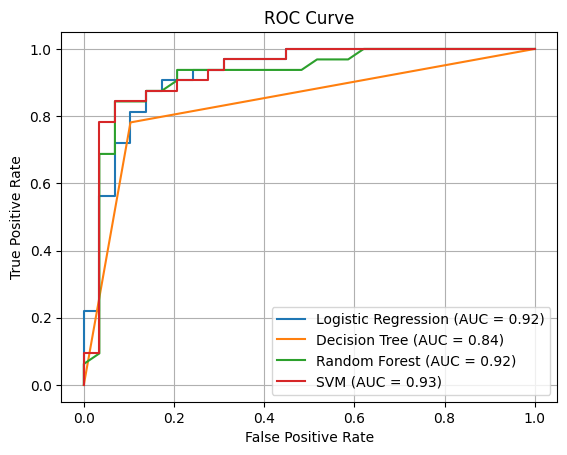

Model evaluation completed successfully!


In [40]:
# Evaluate models
models = {
    "Logistic Regression": (log_reg_pred, log_reg_prob),
    "Decision Tree": (dec_tree_pred, dec_tree_prob),
    "Random Forest": (rand_forest_pred, rand_forest_prob),
    "SVM": (svm_pred, svm_prob)
}

print("Evaluating models...")
for model_name, (pred, prob) in models.items():
    print(f"\n{model_name}:")
    print(classification_report(y_test, pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC Curve
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Model evaluation completed successfully!")

Optimizing Random Forest using GridSearchCV...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.7852366255144032
Optimizing SVM using RandomizedSearchCV...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.7852366255144032
Optimizing SVM using RandomizedSearchCV...
Best parameters for SVM: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
Best score for SVM: 0.8140432098765432
Comparing optimized models with baseline performance...

Optimized Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.96      0.81      0.88        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61




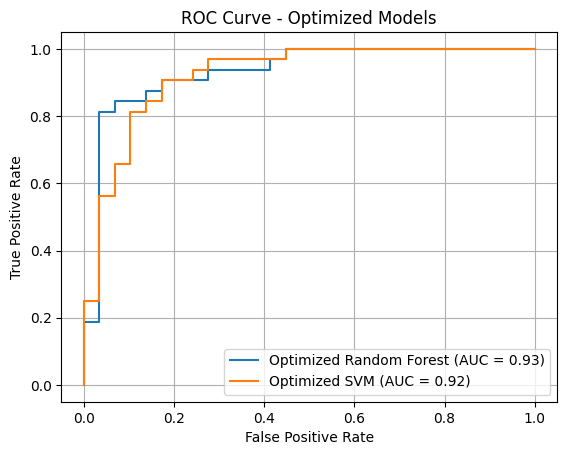

Hyperparameter tuning and comparison completed successfully!


In [41]:
# Hyperparameter Tuning

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Random Forest - GridSearchCV
print("Optimizing Random Forest using GridSearchCV...")
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

# SVM - RandomizedSearchCV
print("Optimizing SVM using RandomizedSearchCV...")
random_search_svm = RandomizedSearchCV(estimator=SVC(probability=True, random_state=42), param_distributions=param_grid_svm, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search_svm.fit(X_train, y_train)
print("Best parameters for SVM:", random_search_svm.best_params_)
print("Best score for SVM:", random_search_svm.best_score_)

# Compare optimized models with baseline performance
print("Comparing optimized models with baseline performance...")
optimized_rf = grid_search_rf.best_estimator_
optimized_rf_pred = optimized_rf.predict(X_test)
optimized_rf_prob = optimized_rf.predict_proba(X_test)[:, 1]

optimized_svm = random_search_svm.best_estimator_
optimized_svm_pred = optimized_svm.predict(X_test)
optimized_svm_prob = optimized_svm.predict_proba(X_test)[:, 1]

# Evaluate optimized models
models_optimized = {
    "Optimized Random Forest": (optimized_rf_pred, optimized_rf_prob),
    "Optimized SVM": (optimized_svm_pred, optimized_svm_prob)
}

for model_name, (pred, prob) in models_optimized.items():
    print(f"\n{model_name}:")
    print(classification_report(y_test, pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC Curve for optimized models
plt.title('ROC Curve - Optimized Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Hyperparameter tuning and comparison completed successfully!")

In [43]:
# Save the feature names used during model training
trained_feature_names = X_train.columns.tolist()
with open('trained_feature_names.txt', 'w') as f:
    f.write("\n".join(trained_feature_names))

print("Feature names saved successfully!")

Feature names saved successfully!


In [42]:
import joblib

# Save the best trained finetuned model (optimized_rf) to a .pkl file
joblib.dump(optimized_rf, 'optimized_random_forest_model.pkl')

# If you want to save the optimized SVM instead, use:
# joblib.dump(optimized_svm, 'optimized_svm_model.pkl')

['optimized_random_forest_model.pkl']